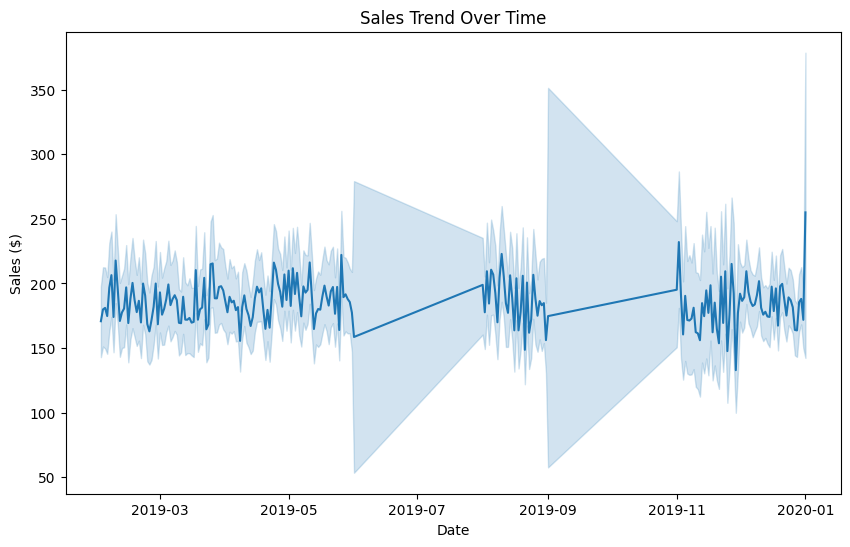

<ipython-input-2-ca0393a964a1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


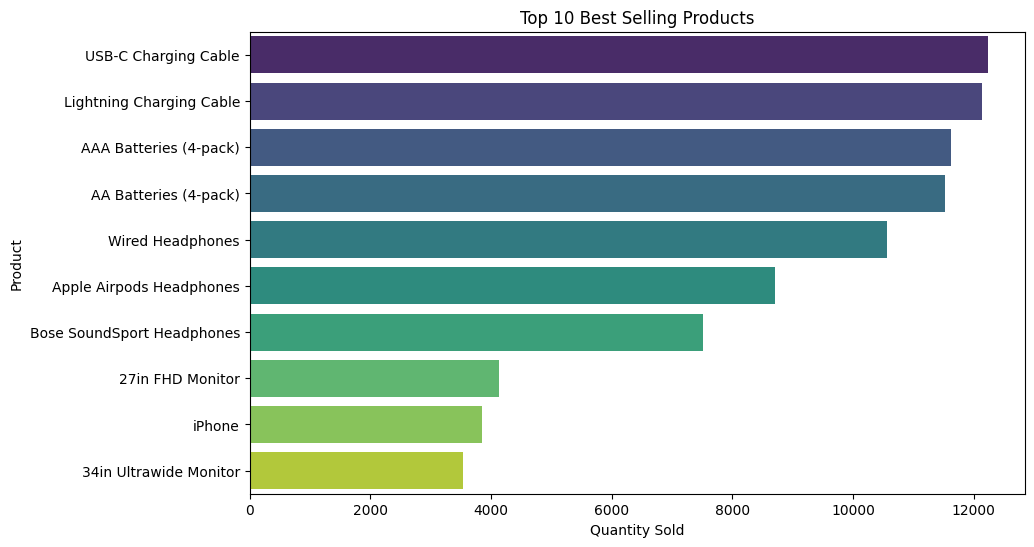

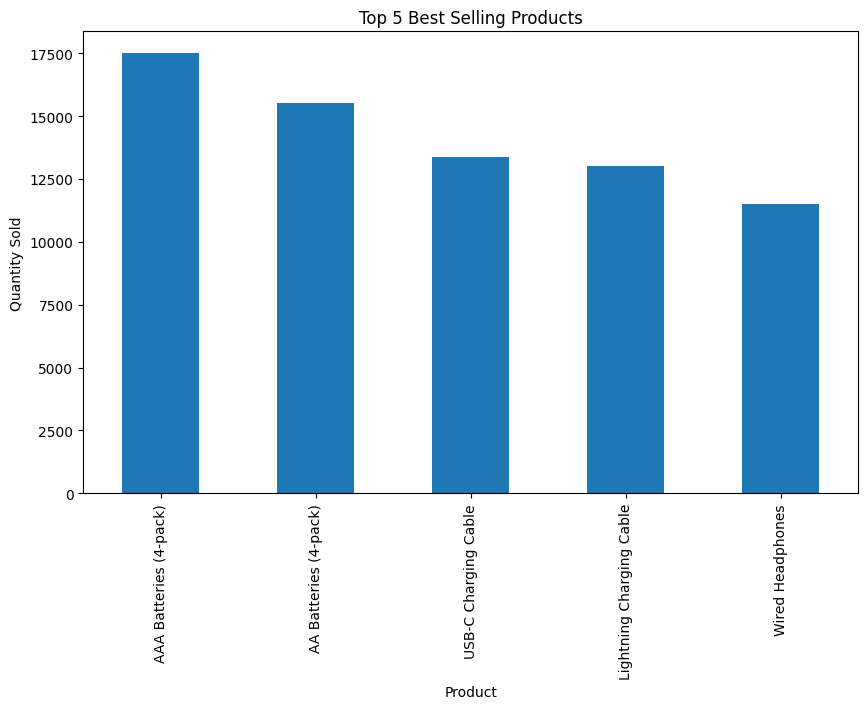

<ipython-input-2-ca0393a964a1>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


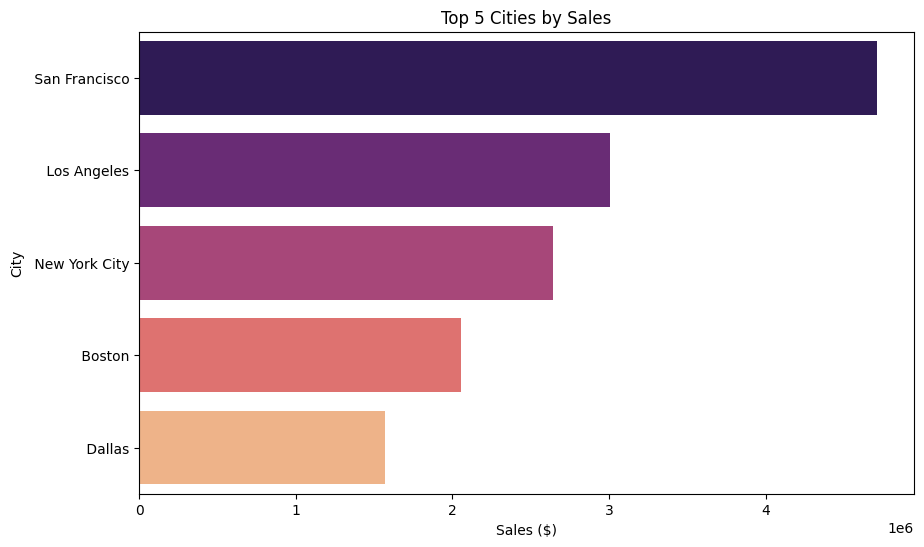

<ipython-input-2-ca0393a964a1>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weekday', y='Sales', data=sales_data, estimator=sum, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='rocket')


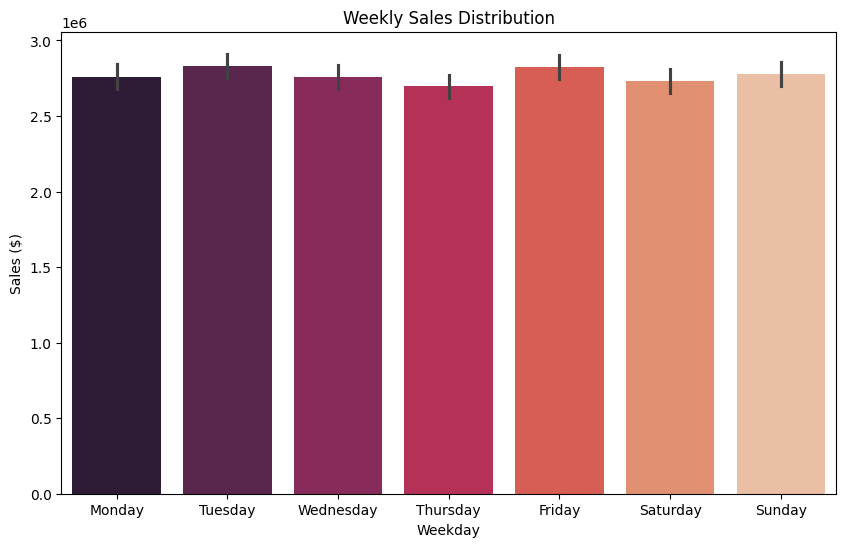

Total Profit: $ 19378605.189999994
Total Quantity Sold: 117288
Profit Margin:  -0.0 %


In [2]:
# STEP 1: Load the dataset
import pandas as pd

# Load the dataset
sales_data = pd.read_csv("Sales Data.csv")

# Display the first few rows of the dataset
sales_data.head()

# STEP 2: Promote headers and detect data types (not applicable in Python)

# STEP 3: Split datetime into date and time stamp
# Convert 'Order Date' column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Splitting datetime into date and time stamp
sales_data['Date'] = sales_data['Order Date'].dt.date
sales_data['Time'] = sales_data['Order Date'].dt.time

# Display the modified dataframe
sales_data.head()

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Sales trend over time using line chart
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Sales', data=sales_data)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.show()

# STEP 2: Best selling products using tree map
plt.figure(figsize=(10,6))
top_products = sales_data['Product'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

# STEP 3: Top 5 best selling products using stacked bar chart
top_5_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)
top_5_products.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top 5 Best Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

# STEP 4: Top 5 cities by sales using map
plt.figure(figsize=(10,6))
top_cities = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 5 Cities by Sales')
plt.xlabel('Sales ($)')
plt.ylabel('City')
plt.show()

# STEP 5: Weekly sales distribution by weekday using column chart
plt.figure(figsize=(10,6))
sales_data['Weekday'] = sales_data['Order Date'].dt.day_name()
sns.barplot(x='Weekday', y='Sales', data=sales_data, estimator=sum, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='rocket')
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekday')
plt.ylabel('Sales ($)')
plt.show()

# STEP 6: Slicer visualization
# Not applicable in Python

# STEP 7: Revenue metrics
# Total profit
total_profit = sales_data['Sales'].sum()

# Sales quantity
total_quantity_sold = sales_data['Quantity Ordered'].sum()

# Profit margin
total_cost = (sales_data['Quantity Ordered'] * sales_data['Price Each']).sum()
profit_margin = ((total_profit - total_cost) / total_profit) * 100

# Display revenue metrics
print("Total Profit: $", total_profit)
print("Total Quantity Sold:", total_quantity_sold)
print("Profit Margin: ", round(profit_margin, 2), "%")
